In [1]:
import sys
sys.path.append('../src')
from Mapping import *
sys.path.append('../src/prediction')
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

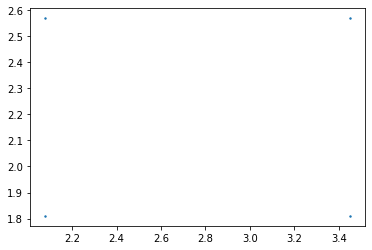

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
import torch
import torch.nn as nn
import random

In [5]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
    

In [6]:
input_size = 15
# input_size = 9
output_size = 2
hidden_size = 20
num_epochs = 2
learning_rate = 0.001

In [7]:
model = NeuralNet(input_size, hidden_size, output_size)
model = model.float()

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [10]:
X = cp_torch
y = room_coords

In [11]:
y

[tensor([2.0800, 1.8100], dtype=torch.float64),
 tensor([3.4500, 1.8100], dtype=torch.float64),
 tensor([3.4500, 2.5700], dtype=torch.float64),
 tensor([2.0800, 2.5700], dtype=torch.float64)]

In [12]:
for i in range(10000):
    for x_i, y_i in zip(X, y):
    
        outputs = model(x_i.float())
        loss = criterion(outputs, y_i.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
#         print(loss.item())

C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([399, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([300, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kazzh\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([500, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_lo

In [13]:
len(cp_list)

11

In [65]:
maps_train = []
for i in list(itertools.chain(cp_list[0], cp_list[1], cp_list[2], cp_list[3])):
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps_train.append(prediction)

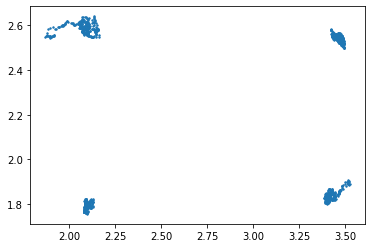

In [66]:
mapX_train = [x[0] for x in maps_train]
mapy_train = [x[1] for x in maps_train]
plt.scatter(mapX_train, mapy_train, s=2)

In [17]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

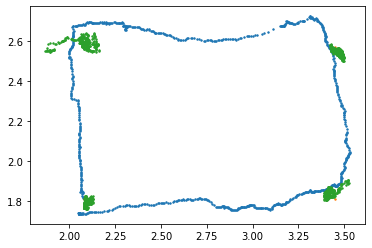

In [68]:
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)
plt.scatter(mapX_train, mapy_train, s=2)

In [19]:
l_maps = []
for i in active_long_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    l_maps.append(prediction)

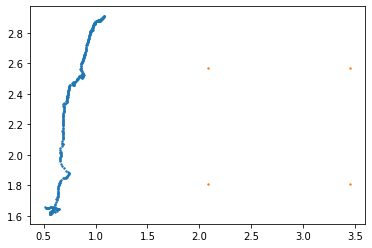

In [20]:
mapX_l = [x[0] for x in l_maps]
mapy_l = [x[1] for x in l_maps]
plt.scatter(mapX_l, mapy_l, s=2)
plt.scatter(room_x, room_y, s=2)

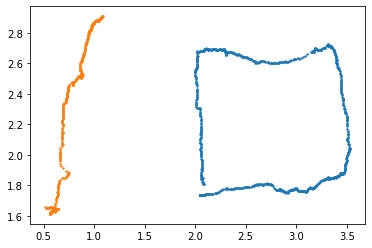

In [21]:
plt.scatter(mapX, mapy, s=2)
plt.scatter(mapX_l, mapy_l, s=2)

In [22]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

In [23]:
V5.keys()

dict_keys(['active_long_table_slide_DOA', 'active_long_table_slide_matrix', 'cp_list', 'active_L_table_slide_matrix', 'active_L_table_slide_DOA'])

In [24]:
sys.path.append('../src/data_processing')
from make_coords import make_coords

In [25]:
import pandas as pd
import itertools
doa2 = pickle.load(open('../data/doa_proj2_allData.p','rb'))

In [26]:
doa2['cp12']['source0']

,quantized_time,X_0_0,Y_0_0,Z_0_0,X_0_1,Y_0_1,Z_0_1,X_0_2,Y_0_2,Z_0_2,...,Z_0_4,X_0_5,Y_0_5,Z_0_5,X_0_6,Y_0_6,Z_0_6,X_0_7,Y_0_7,Z_0_7
0,1645930620.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.587750,-0.146250,0.795250,NaN,NaN,NaN,0.279625,-0.754125,0.59400
1,1645930620.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.593000,-0.142375,0.792625,NaN,NaN,NaN,0.282125,-0.752125,0.59550
2,1645930620.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.597375,-0.139125,0.790125,NaN,NaN,NaN,0.286500,-0.749500,0.59675
3,1645930620.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.600750,-0.136250,0.787875,NaN,NaN,NaN,0.288875,-0.747625,0.59800
4,1645930620.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.603375,-0.133500,0.786375,NaN,NaN,NaN,0.291250,-0.746375,0.59850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1645930739.680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.584250,-0.130125,0.801000,NaN,NaN,NaN,0.286000,-0.738000,0.61100
1871,1645930739.744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.582250,-0.132000,0.802375,NaN,NaN,NaN,0.286750,-0.738000,0.61100
1872,1645930739.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.583250,-0.131375,0.801500,NaN,NaN,NaN,0.287000,-0.738000,0.61075
1873,1645930739.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.582625,-0.130000,0.802000,NaN,NaN,NaN,0.287875,-0.737375,0.61100


In [27]:
cp1 = doa2['cp1']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp2 = doa2['cp2']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp3 = doa2['cp3']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp4 = doa2['cp4']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp5 = doa2['cp5']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp6 = doa2['cp6']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp7 = doa2['cp7']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp8 = doa2['cp8']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp9 = doa2['cp9']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp10 = doa2['cp10']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp11 = doa2['cp11']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()
cp12 = doa2['cp12']['source0'].dropna(axis=1, how='all').iloc[600:1200, 1:].to_numpy()

In [28]:
y1 = load_coordinates()[1]
y2 = load_coordinates()[2]
y3 = load_coordinates()[3]
y4 = load_coordinates()[4]
y5 = load_coordinates()[5]
y6 = load_coordinates()[6]
y7 = load_coordinates()[7]
y8 = load_coordinates()[8]
y9 = load_coordinates()[9]
y10 = load_coordinates()[10]
y11 = load_coordinates()[11]
y12 = load_coordinates()[12]

In [29]:
y1

array([130.  ,  52.75])

In [30]:
pd.to_datetime(doa2['cp3']['source0']['quantized_time'].astype('int'), unit='s')

0      2022-02-27 02:39:00
1      2022-02-27 02:39:00
2      2022-02-27 02:39:00
3      2022-02-27 02:39:00
4      2022-02-27 02:39:00
               ...        
1400   2022-02-27 02:40:59
1401   2022-02-27 02:40:59
1402   2022-02-27 02:40:59
1403   2022-02-27 02:40:59
1404   2022-02-27 02:40:59
Name: quantized_time, Length: 1405, dtype: datetime64[ns]

In [31]:
pd.DataFrame(active_L_table_slide_DOA).iloc[:,6:]

,6,7,8,9,10,11,12,13,14
0,-0.262000,0.434000,0.862000,0.239000,-0.555000,0.797000,0.400000,0.41000,0.820000
1,-0.261000,0.434000,0.862000,0.239000,-0.555000,0.797000,0.400000,0.41000,0.820000
2,-0.261000,0.434000,0.862000,0.238625,-0.554375,0.797000,0.400000,0.41000,0.820000
3,-0.261000,0.434000,0.862000,0.239000,-0.554000,0.797000,0.400000,0.41000,0.820000
4,-0.261000,0.434000,0.862000,0.239000,-0.554000,0.797000,0.400000,0.41000,0.820000
...,...,...,...,...,...,...,...,...,...
832,-0.229250,0.438750,0.868875,0.246250,-0.509750,0.824250,0.368250,0.41925,0.829625
833,-0.230000,0.437000,0.869625,0.243000,-0.511875,0.824000,0.368500,0.41725,0.830875
834,-0.231125,0.435375,0.870000,0.241750,-0.513000,0.823500,0.369375,0.41525,0.831125
835,-0.231250,0.433625,0.870875,0.238375,-0.513250,0.824375,0.366750,0.41450,0.832750


In [32]:
cps = [cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8, cp9, cp10, cp11, cp12]
ys = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12]

In [48]:
model_9 = NeuralNet(input_size=9, hidden_size=20, output_size=output_size)
model_9 = model_9.float()
criterion_9 = nn.MSELoss()
optimizer_9 = torch.optim.SGD(model_9.parameters(), lr=learning_rate)

In [34]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [35]:
X_9 = [torch.from_numpy(cp4), torch.from_numpy(cp6), torch.from_numpy(cp10), torch.from_numpy(cp12)]
y_9 = [torch.from_numpy(y4), torch.from_numpy(y6), torch.from_numpy(y10), torch.from_numpy(y12)]

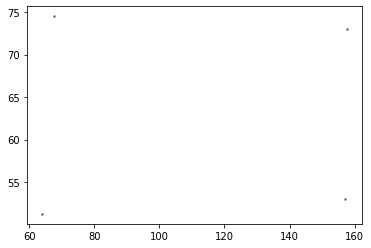

In [36]:
room_x1 = [i[0] for i in [y4, y6, y10, y12]]
room_y1 = [i[1] for i in [y4, y6, y10, y12]]
plt.scatter(room_x1, room_y1, s=2)

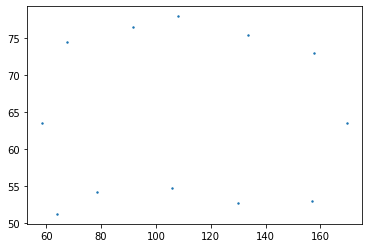

In [37]:
room_x2 = [i[0] for i in ys]
room_y2 = [i[1] for i in ys]
plt.scatter(room_x2, room_y2, s=2)

In [38]:
ys

[array([130.  ,  52.75]),
 array([106.  ,  54.75]),
 array([78.5 , 54.25]),
 array([64.  , 51.25]),
 array([58.5, 63.5]),
 array([67.5, 74.5]),
 array([91.5, 76.5]),
 array([108.,  78.]),
 array([133.5,  75.5]),
 array([157.5,  73. ]),
 array([169.5,  63.5]),
 array([157.,  53.])]

In [49]:
for i in range(10000):
    for x_i, y_i in zip(X_9, y_9):
    
        outputs = model_9(x_i.float())
        loss = criterion_9(outputs, y_i.float())
        optimizer_9.zero_grad()
        loss.backward()
        optimizer_9.step()

In [50]:
maps9 = []
for i in list(itertools.chain(cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8, cp9, cp10, cp11, cp12)):
    testI = torch.from_numpy(i)
    prediction = model_9(testI.float()).tolist()
    maps9.append(prediction)

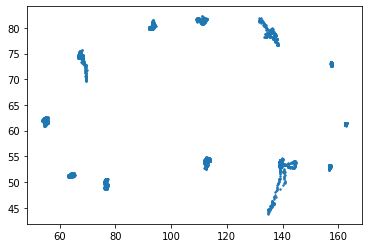

In [51]:
mapX9 = [x[0] for x in maps9]
mapy9 = [x[1] for x in maps9]
plt.scatter(mapX9, mapy9, s=2)
# plt.scatter(room_x9, room_y9, s=2)

In [45]:

list(itertools.chain(cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8, cp9, cp10, cp11, cp12))

In [ ]:
cp3